<a href="https://www.kaggle.com/code/mohammadfaizanraza/data-cleaning-transformation?scriptVersionId=132149145" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [3]:
import numpy as np
import pandas as pd 
import os
from pathlib import Path
import urllib.request
import re
import datetime as dt

# Understanding DataSet

In [4]:
def load_csv():
  csv_path=Path('dataset/fifa21_raw_data.csv')
  if not csv_path.is_file():
    Path('dataset').mkdir(parents=True,exist_ok=True)
    url = 'https://github.com/krishan0520/Data_cleaning/raw/master/fifa21_raw_data.csv'
    urllib.request.urlretrieve(url,csv_path)
    return pd.read_csv(csv_path,low_memory=True)
df = load_csv()

/tmp/ipykernel_32/1082894293.py:7: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(csv_path,low_memory=True)


In [5]:
df.shape

(18979, 77)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

Droping unneccesary columns

In [7]:
df.drop(['photoUrl','playerUrl','LongName'],axis=1)

,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,...,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,...,High,Low,5 ★,89,93,81,89,35,77,\n344
2,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,...,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,...,High,High,4 ★,76,86,93,88,64,78,\n163
4,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,...,High,Medium,5 ★,91,85,86,94,36,59,\n273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,China PR,CB,Zhang Mengxuan,21,47,52,\n\n\n\nChongqing Dangdai Lifan FC SWM Team\n2...,257710,"5'10""",154lbs,...,Low,Low,1 ★,58,23,26,27,50,48,2
18975,England,ST,V. Da Silva,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258736,"5'7""",128lbs,...,Medium,Medium,1 ★,70,46,40,53,16,40,3
18976,China PR,CB,Xia Ao,21,47,55,\n\n\n\nWuhan Zall\n2018 ~ 2022\n\n,247223,"5'10""",146lbs,...,Medium,Medium,1 ★,64,28,26,38,48,51,3
18977,England,CM,B. Hough,17,47,67,\n\n\n\nOldham Athletic\n2020 ~ 2021\n\n,258760,"5'9""",143lbs,...,Medium,Medium,1 ★,64,40,48,49,35,45,5


# Cleaning

In [8]:
#lets convert wheight into its actual form
df['Weight'].unique()

array(['159lbs', '183lbs', '192lbs', '154lbs', '150lbs', '176lbs',
       '161lbs', '201lbs', '157lbs', '152lbs', '203lbs', '187lbs',
       '185lbs', '212lbs', '179lbs', '181lbs', '165lbs', '190lbs',
       '196lbs', '163lbs', '168lbs', '141lbs', '172lbs', '198lbs',
       '146lbs', '132lbs', '207lbs', '174lbs', '148lbs', '143lbs',
       '130lbs', '134lbs', '194lbs', '205lbs', '214lbs', '170lbs',
       '137lbs', '139lbs', '209lbs', '220lbs', '128lbs', '216lbs',
       '227lbs', '218lbs', '123lbs', '225lbs', '223lbs', '126lbs',
       '121lbs', '229lbs', '236lbs', '243lbs', '117lbs', '110lbs',
       '119lbs', '115lbs'], dtype=object)

In [9]:
#height also
df['Height'].unique()

array(['5\'7"', '6\'2"', '5\'11"', '5\'9"', '6\'0"', '5\'10"', '6\'3"',
       '6\'4"', '6\'1"', '6\'6"', '5\'8"', '5\'6"', '6\'5"', '5\'5"',
       '5\'4"', '6\'7"', '5\'2"', '5\'3"', '6\'8"', '5\'1"', '6\'9"'],
      dtype=object)

In [10]:
def converWeight(x):
    if "kg" in x:
        return int(x.replace("kg",""))
    else:
        return round(int(x.replace("lbs",""))/2.205)
    return 0

In [11]:
def converHeight(x):
    if x[-1]=='"':
        foot = int(x[0])*30.48
        inches = int(x[-2])*2.54
        return round(foot+inches)
    elif x[-1] =='m':
        return int(x.replace("cm",""))
    return 0

In [12]:
df['Weight'] = df['Weight'].apply(converWeight)

In [13]:
df['Height'] = df['Height'].apply(lambda x : converHeight(x))

In [14]:
#lets split Date into Day, Month, Year columns
df['Joined'].unique()

array(['Jul 1, 2004', 'Jul 10, 2018', 'Jul 16, 2014', ..., 'Sep 22, 2018',
       'Mar 6, 2018', 'Feb 28, 2015'], dtype=object)

In [15]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [16]:
df["Joined_Year"] = df['Joined'].dt.strftime('%Y')

In [17]:
df["Joined_Month"] = df["Joined"].dt.strftime('%m')

In [18]:
df["Joined_Day"] = df["Joined"].dt.strftime('%d')

In [19]:
#drop it we dont need it any more
df = df.drop(["Joined"],axis=1)

In [20]:
#clean Currency present in different formate in different columns
def cleanCurrency(x):
    x=x.replace("€","")
    suffix = x[-1]
    if suffix=='K':
        return float(x.replace("K",""))*1000
    if suffix=='M':
        return float(x.replace("M",""))*1e6
    return float(x)

In [21]:
df["Wage"] = df["Wage"].apply(cleanCurrency)

In [22]:
df['Value']=df['Value'].apply(cleanCurrency)

In [23]:
df['Release Clause']=df['Release Clause'].apply(cleanCurrency)

In [24]:
#lets split <Team & Contract> column
def createTeam(x):
    x = x.replace("\n","")
    if x[-4:].isnumeric():
        return x[:-11]
    elif x[-4:] == 'Loan':
        return x[:-12]
    else:
        return x

In [25]:
def createContract(x):
    if x[-4:].isnumeric():
        return x[-11:]
    elif x[-4:] == 'Loan':
        return x[-12:]
    else:
        return None

In [26]:
df["Team"] = df["Team & Contract"].apply(lambda x: createTeam(x))

In [27]:
df["Contract"] = df["Team & Contract"].apply(lambda x: createContract(x))

In [28]:
df["Team"].unique()

array(['FC Barcelona', 'Juventus', 'Atlético Madrid', ...,
       'Cheltenham TownJan 4, ', 'FC SionDec 31, ',
       'Macarthur FCAug 31, '], dtype=object)

In [29]:
df["Contract"].unique()

array([None], dtype=object)

In [30]:
df.drop(["Team & Contract"] , axis = 1)

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,ID,...,PAS,DRI,DEF,PHY,Hits,Joined_Year,Joined_Month,Joined_Day,Team,Contract
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,158023,...,91,95,38,65,\n372,2004,07,01,FC Barcelona,None
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,...,81,89,35,77,\n344,2018,07,10,Juventus,None
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,200389,...,78,90,52,90,\n86,2014,07,16,Atlético Madrid,None
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,...,93,88,64,78,\n163,2015,08,30,Manchester City,None
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,190871,...,86,94,36,59,\n273,2017,08,03,Paris Saint-Germain,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,https://cdn.sofifa.com/players/257/710/21_60.png,Mengxuan Zhang,http://sofifa.com/player/257710/mengxuan-zhang...,China PR,CB,Zhang Mengxuan,21,47,52,257710,...,26,27,50,48,2,2020,08,01,Chongqing Dangdai Lifan FC SWM Team,None
18975,https://cdn.sofifa.com/players/258/736/21_60.png,Vani Da Silva,http://sofifa.com/player/258736/vani-da-silva/...,England,ST,V. Da Silva,17,47,67,258736,...,40,53,16,40,3,2020,08,01,Oldham Athletic,None
18976,https://cdn.sofifa.com/players/247/223/21_60.png,Ao Xia,http://sofifa.com/player/247223/ao-xia/210005/,China PR,CB,Xia Ao,21,47,55,247223,...,26,38,48,51,3,2018,07,13,Wuhan Zall,None
18977,https://cdn.sofifa.com/players/258/760/21_60.png,Ben Hough,http://sofifa.com/player/258760/ben-hough/210005/,England,CM,B. Hough,17,47,67,258760,...,48,49,35,45,5,2020,08,01,Oldham Athletic,None


In [31]:
#removing start from columns
df.IR = df.IR.apply(lambda x: x.rstrip("★"))
df.SM = df.SM.apply(lambda x: x.rstrip("★"))
df['W/F'] = df['W/F'].apply(lambda x: x.rstrip("★"))

In [32]:
def convert_hit(value):
  if isinstance(value,str):
    value=value.strip()
    if value.endswith('K'):
      return float(value[:-1])*1e3
    else:
      return float(value)
  else:
    return float(value)

In [33]:
df["Hits"] = df["Hits"].apply(convert_hit)

In [34]:
#Data is Cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   photoUrl          18979 non-null  object 
 1   LongName          18979 non-null  object 
 2   playerUrl         18979 non-null  object 
 3   Nationality       18979 non-null  object 
 4   Positions         18979 non-null  object 
 5   Name              18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Team & Contract   18979 non-null  object 
 10  ID                18979 non-null  int64  
 11  Height            18979 non-null  int64  
 12  Weight            18979 non-null  int64  
 13  foot              18979 non-null  object 
 14  BOV               18979 non-null  int64  
 15  BP                18979 non-null  object 
 16  Growth            18979 non-null  int64 

# Data Visualization

In [35]:
!pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21069 sha256=7d344791556f36d948619c82b4d69fe1c1c131aa7bd19b1e8fe82be96eb6f482
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2e2d41fb52450de918a6785
Successfully built mplcursors


In [36]:
import matplotlib.pyplot as plt
import mplcursors

In [37]:
def draw_scatter_plot(x_values, y_values):
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_values, y_values)
    ax.set_xlabel('Wages')
    ax.set_ylabel('Value')
    # Add data cursors
    mplcursors.cursor(scatter, hover=True).connect("add", lambda sel: sel.annotation.set_text(f"({sel.target[0]:.2f}, {sel.target[1]:.2f})"))
    ax.set_title('Scatter Plot')
    plt.show()

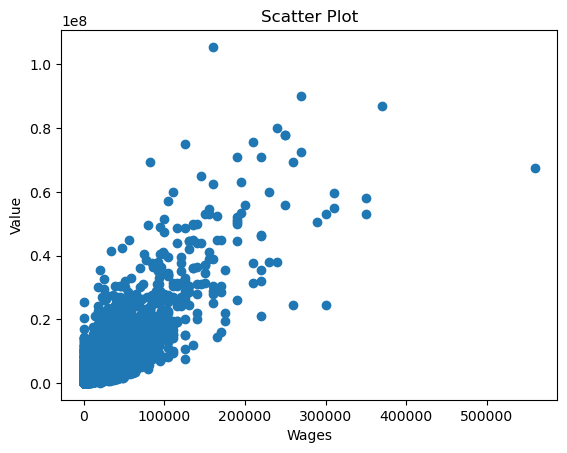

In [38]:
draw_scatter_plot(df['Wage'], df['Value'])